# Time series with pandas


In [1]:
pip install statsmodels


In [2]:
# import and download data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

eth = pd.read_csv('https://github.com/hitoshinagano/data/blob/main/ETHUSDT_2021.gzip?raw=true',
                  compression='gzip', parse_dates=['open_time'], index_col='open_time')

print(eth.head())  # print first few rows
print(eth.info())  # check for data types and missing values

                      open_time_ms    open    high     low   close  \
open_time                                                            
2021-01-01 00:00:00  1609459200000  736.42  737.09  735.94  737.02   
2021-01-01 00:01:00  1609459260000  737.12  739.00  737.06  738.74   
2021-01-01 00:02:00  1609459320000  738.78  738.81  737.35  737.82   
2021-01-01 00:03:00  1609459380000  737.74  738.20  737.28  737.43   
2021-01-01 00:04:00  1609459440000  737.38  737.80  736.80  736.89   

                         volume     close_time  quote_asset_volume  \
open_time                                                            
2021-01-01 00:00:00   647.71994  1609459259999       476877.876291   
2021-01-01 00:01:00  1122.95415  1609459319999       828662.134054   
2021-01-01 00:02:00   418.49987  1609459379999       308922.657830   
2021-01-01 00:03:00   305.98424  1609459439999       225752.744573   
2021-01-01 00:04:00   350.36312  1609459499999       258306.222210   

                  

In [3]:
# Index validation

eth.index.is_unique
eth.index.is_monotonic_increasing  # check if the index is sorted in ascending order
eth.shape

# Handling dupicates or non monotonic indexes

if not eth.index.is_unique:
    eth = eth[~eth.index.duplicated(keep='first')]  # Remove duplicates

if not eth.index.is_monotonic_increasing:
    eth = eth.sort_index()  # Sort the index to make it monotonic

## Visualization

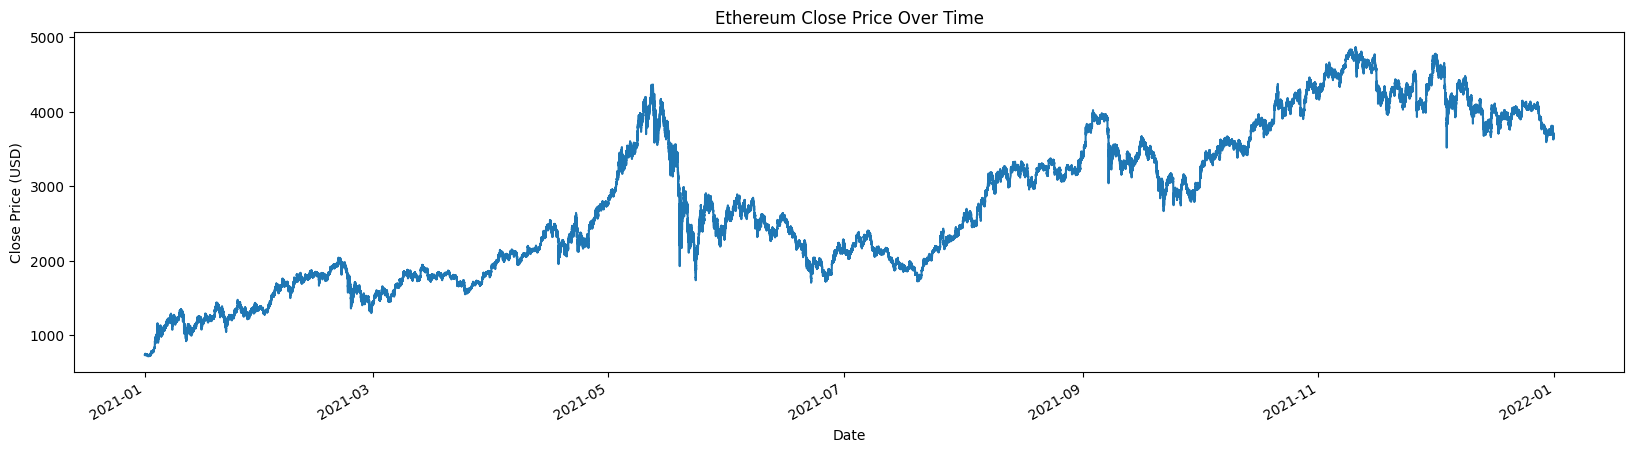

In [4]:
eth.close.plot(figsize=(20, 5))  # Plotting the 'close' column
plt.title('Ethereum Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

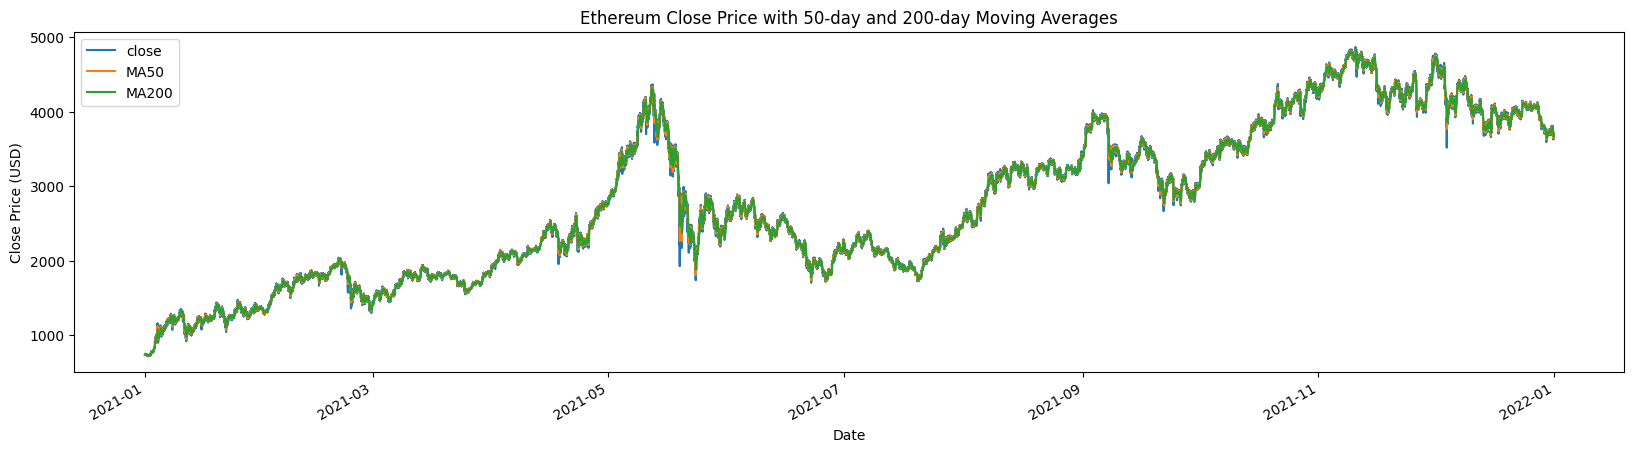

In [5]:
# Plot moving averages

eth['MA50'] = eth['close'].rolling(window=50).mean()
eth['MA200'] = eth['close'].rolling(window=200).mean()

eth[['close', 'MA50', 'MA200']].plot(figsize=(20, 5))
plt.title('Ethereum Close Price with 50-day and 200-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

## Indexing and slicing

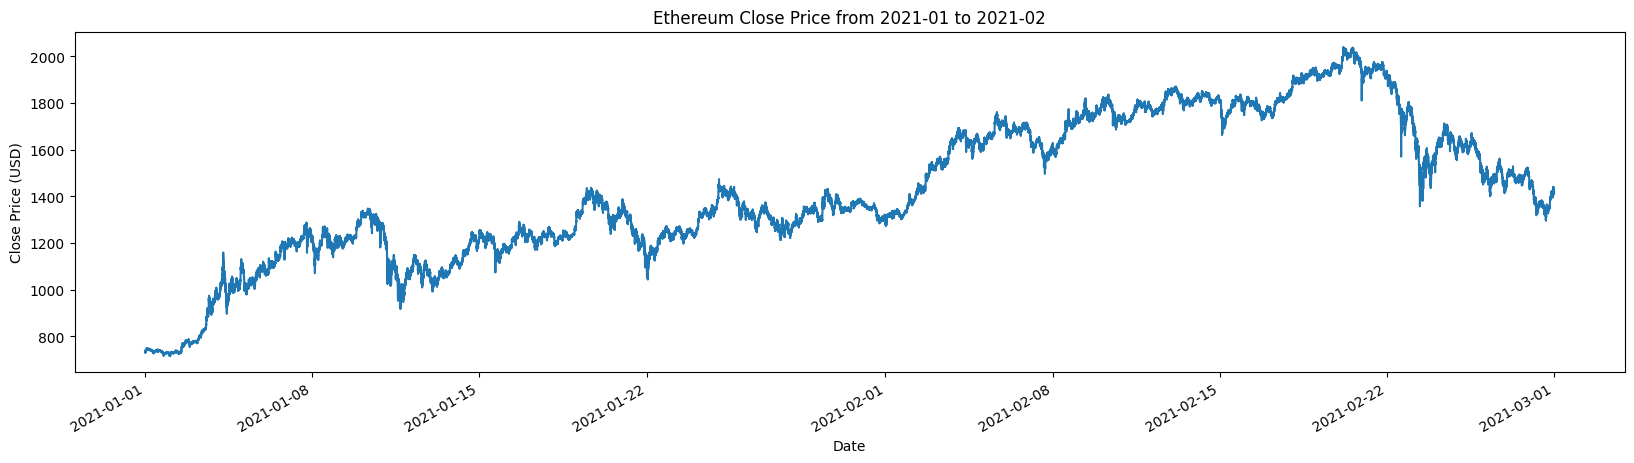

In [6]:
# Dynamic time slicing to look at different months or weeks

def plot_time_slice(df, start, end):
    sliced_df = df.loc[start:end]
    sliced_df['close'].plot(figsize=(20, 5))
    plt.title(f'Ethereum Close Price from {start} to {end}')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.show()

plot_time_slice(eth, '2021-01', '2021-02')  # Example: plot for January to February 2021


## Missing data

In [7]:
eth.reset_index()['open_time'].diff().value_counts()  # Checking time gaps

,count
open_time,
0 days 00:01:00,524600
0 days 01:20:00,1
0 days 01:31:00,1
0 days 02:31:00,1
0 days 04:45:00,1
0 days 04:31:00,1
0 days 02:01:00,1


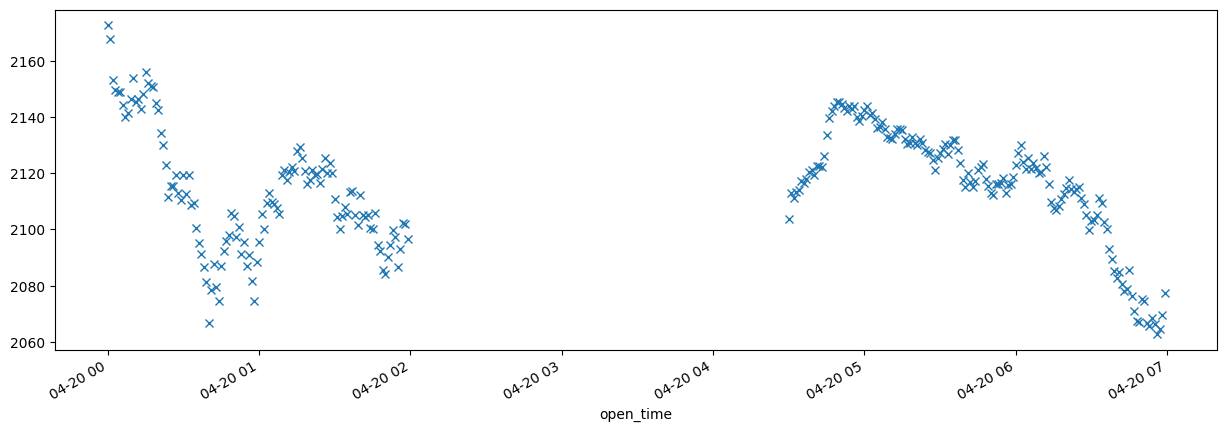

In [8]:
# plot missing data gaps

eth.loc['2021-04-20 00': '2021-04-20 06', 'close'].plot(figsize=(15, 5), ls='', marker='x');


In [9]:
# reindexing data to fill gaps

start_end_range = pd.date_range(start=eth.index[0], end=eth.index[-1], freq='1min')
eth = eth.reindex(start_end_range)

In [10]:
# Forward fill missing values

eth.fillna(method='ffill', inplace=True)

<ipython-input-10-f95087ed9198>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  eth.fillna(method='ffill', inplace=True)


In [11]:
# Option 1: Interpolation (default: linear)
# eth2 = eth.interpolate()

# Option 2: Forward fill
# eth2 = eth.fillna(method='ffill')

# Option 3: Backward fill
# eth2 = eth.fillna(method='bfill')


# Filling Missing Values
In this step, we could use three different approaches to handle missing values:
1. Interpolation: Useful when we expect values to change gradually over time.
2. Forward Fill: Fills gaps with the last known value, which is useful in financial data.
3. Backward Fill: Fills gaps with the next known value, which is a conservative approach.


In [12]:
# Resampling and Aggregation

eth['close'].resample('1h').agg(['mean', 'std'])  # Hourly resampling
eth['close'].resample('1d').ohlc()  # OHLC data resampling (daily)


,open,high,low,close
2021-01-01,737.02,748.98,715.40,728.91
2021-01-02,728.75,787.12,715.22,774.56
2021-01-03,774.75,1008.72,769.62,978.28
2021-01-04,985.04,1159.09,896.25,1041.43
2021-01-05,1050.59,1131.10,978.66,1099.56
...,...,...,...,...
2021-12-27,4068.39,4124.77,4034.01,4037.23
2021-12-28,4030.62,4031.46,3761.36,3792.75
2021-12-29,3797.86,3826.08,3609.64,3630.19
2021-12-30,3637.22,3766.93,3589.88,3709.27


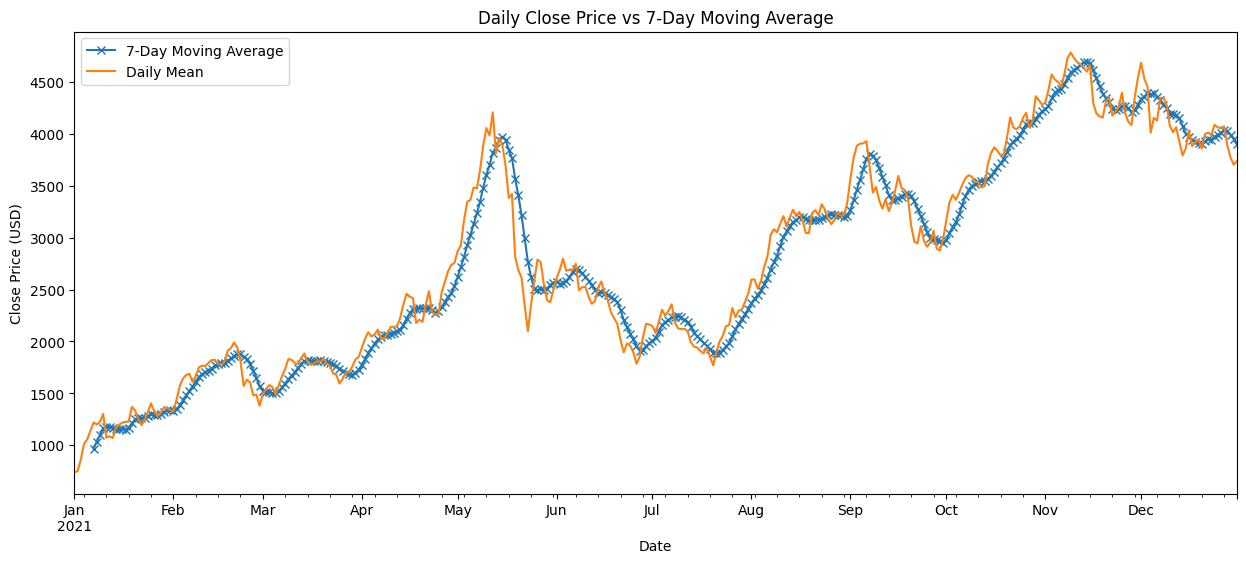

In [13]:
# resampling and 7-day moving average

daily_close = eth['close'].resample('1d').mean()
rolling_7d = daily_close.rolling(7).mean()

rolling_7d.plot(figsize=(15, 6), marker='x', label='7-Day Moving Average')
daily_close.plot(figsize=(15, 6), label='Daily Mean')
plt.title('Daily Close Price vs 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

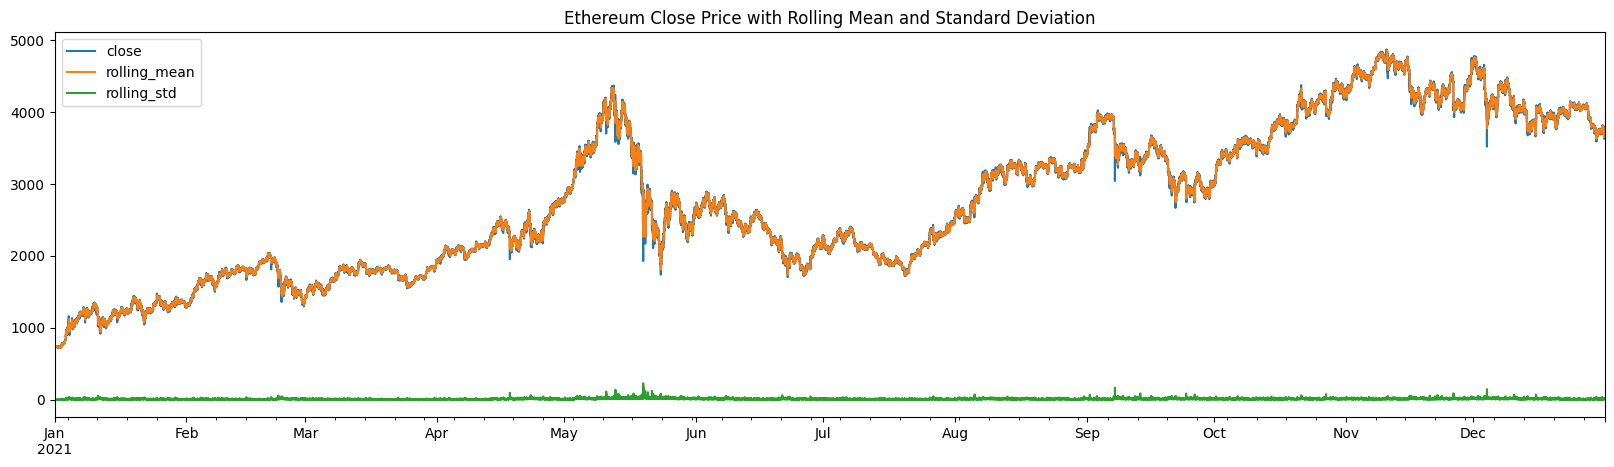

In [14]:
# rolling statistics to observe trends in volatility over time

eth['rolling_mean'] = eth['close'].rolling(window=50).mean()
eth['rolling_std'] = eth['close'].rolling(window=50).std()

eth[['close', 'rolling_mean', 'rolling_std']].plot(figsize=(20, 5))
plt.title('Ethereum Close Price with Rolling Mean and Standard Deviation')
plt.show()


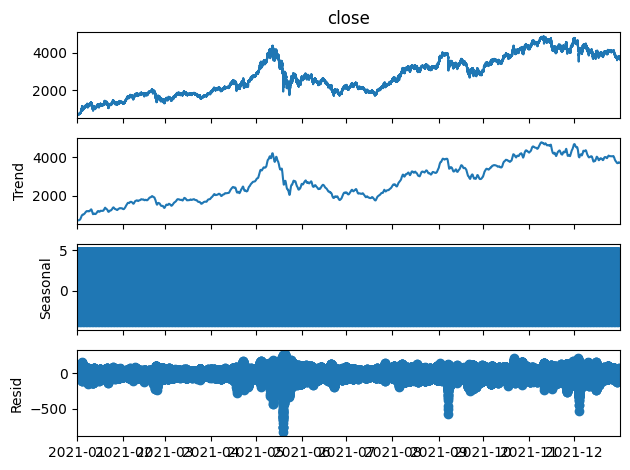

In [15]:
# decompose the time series into trend, seasonal, and residual components

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(eth['close'].dropna(), model='additive', period=1440)  # Assuming daily periodicity
decomposition.plot()
plt.show()


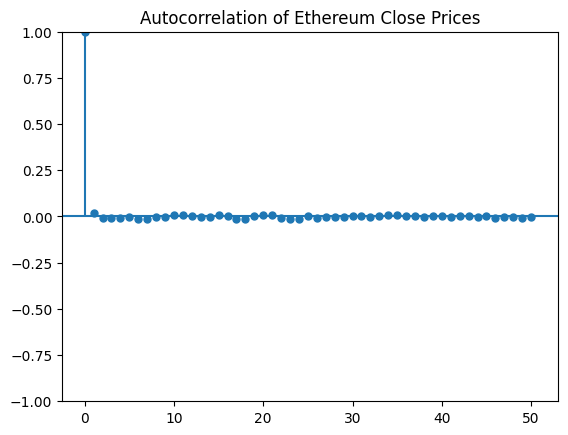

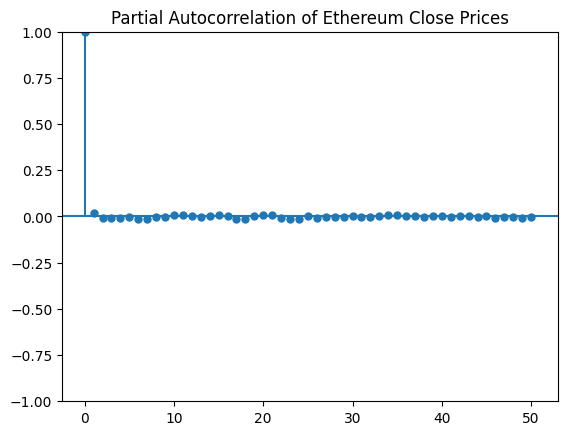

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ensure 'close' column is numeric and drop any missing values
eth['close'] = pd.to_numeric(eth['close'], errors='coerce')
eth_clean = eth['close'].dropna()

# Check if the data is stationary (if needed, you can apply differencing)
eth_diff = eth_clean.diff().dropna()

# Plot Autocorrelation
plot_acf(eth_diff, lags=50)
plt.title('Autocorrelation of Ethereum Close Prices')
plt.show()

# Plot Partial Autocorrelation
plot_pacf(eth_diff, lags=50)
plt.title('Partial Autocorrelation of Ethereum Close Prices')
plt.show()


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:               525600
Model:                 ARIMA(5, 1, 0)   Log Likelihood            -1497374.986
Date:                Wed, 04 Sep 2024   AIC                        2994761.971
Time:                        23:26:22   BIC                        2994829.005
Sample:                    01-01-2021   HQIC                       2994780.908
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0167      0.000     64.235      0.000       0.016       0.017
ar.L2         -0.0094      0.000    -29.535      0.000      -0.010      -0.009
ar.L3         -0.0096      0.000    -30.054      0.0

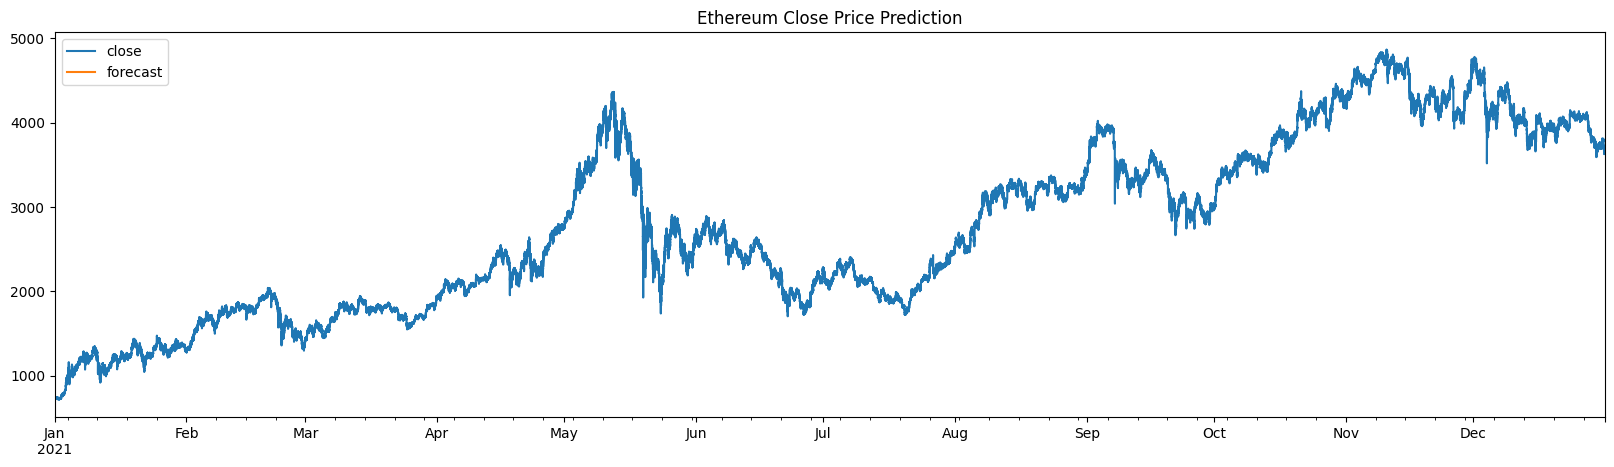

In [19]:
# ARIMA model to predict future values based on the time series

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(eth['close'].dropna(), order=(5,1,0))  # ARIMA(5,1,0) model
model_fit = model.fit()
print(model_fit.summary())

eth['forecast'] = model_fit.predict(start=len(eth), end=len(eth) + 30, dynamic=True)
eth[['close', 'forecast']].plot(figsize=(20, 5))
plt.title('Ethereum Close Price Prediction')
plt.show()
